# ESG Score Prediction

## Notebook Outline :

1. Introduction (ESG Score, Calculation method, Factors - Summary based on the TR pdf)
2. Data Explanation (Features - what they are)
3. Data Processing - Outlier Detection, Feature Transformation 
4. EDA - Basic Insights
6. Feature Selection/Importance
5. Data Modelling

## 1. Introduction 

A financial statement lists the assets, liabilities and equity of a company at a specific point in time and is used to calculate the net worth of a business. A basic tenet of double-entry book-keeping is that total assets (what a business owns) must equal liabilities plus equity (how the assets are financed). In other words, the balance sheet must balance. Subtracting liabilities from assets shows the net worth of the business. 

How does ESG score come into picture in a business?
(TBD by Aheli)


## 2. Data Explanation  

### Total Current Assets 
Current assets are cash or its equivalent or those assets that will be used by the business in a year or less

### Total Current Liabilities 
Debts that are due in one year or less are classified as current liabilities. If they're due in more than one year, they're long-term liabilities.

### Total Debt 
Total debt refers to the sum of borrowed money that your business owes. It’s calculated by adding together your current and long-term liabilities.

### Total Assets Reported 
"Total long-term assets" is the sum of capital and plant, investments, and miscellaneous assets.
"Total assets" is the sum of total current assets and total long-term assets

### Net Income - Actual 
Net income refers to the amount an individual or business makes after deducting costs, allowances and taxes.
In commerce, net income is what the business has left over after all expenses, including salary and wages, cost of goods or raw material and taxes. 

### Revenue Per Share
1. Earnings per share (EPS) is a company's net profit divided by the number of common shares it has outstanding.
2. EPS indicates how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value.
3. A higher EPS indicates greater value because investors will pay more for a company's shares if they think the company has higher profits relative to its share price.
4. EPS can be arrived at in several forms, such as excluding extraordinary items or discontinued operations, or on a diluted basis.
5. Like other financial metrics, earnings per share is most valuable when compared against competitor metrics, companies of the same industry, or across a period of time.

### Total Revenue 
Total revenue is the amount of money a company brings in from selling its goods and services. In other words, company's use this metric to determine how well they're generating money from their core revenue-driving operations.

### Total Equity 
The total equity of a business is derived by subtracting its liabilities from its assets. The information for this calculation can be found on a company's balance sheet, which is one of its financial statements. 
An alternative approach for calculating total equity is to add up all of the line items in the stockholders' equity section of the balance sheet, which is comprised of common stock, additional paid-in capital, and retained earnings, minus treasury stock.
In essence, total equity is the amount invested in a company by investors in exchange for stock, plus all subsequent earnings of the business, minus all subsequent dividends paid out. Many smaller businesses are strapped for cash and so have never paid any dividends. In their case, total equity is simply invested funds plus all subsequent earnings.

### Company Market Capitilization 
Market cap—or market capitalization—refers to the total value of all a company's shares of stock. It is calculated by multiplying the price of a stock by its total number of outstanding shares. For example, a company with 20 million shares selling at $50 a share would have a market cap of $1 billion.

Why is market capitalization such an important concept? It allows investors to understand the relative size of one company versus another. Market cap measures what a company is worth on the open market, as well as the market's perception of its future prospects, because it reflects what investors are willing to pay for its stock.

### Property Plant And Equipment, Total - Gross
Carrying amount at the balance sheet date for long-lived physical assets used in the normal conduct of business and not intended for resale. This can include land, physical structures, machinery, vehicles, furniture, computer equipment, construction in progress, and similar items.

### P/E Ratio
The price/earnings (P/E) ratio, also known as an “earnings multiple,” is one of the most popular valuation measures used by investors and analysts. The basic definition of a P/E ratio is stock price divided by earnings per share (EPS)


## 3. Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Firm Data Import

In [33]:
firm_data = pd.read_csv("Firm Data.csv")

In [17]:
firm_data.head()

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,Total CO2 Equivalent Emissions To Revenues USD in million,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,"Property Plant And Equipment, Total - Gross",P/E (Daily Time Series Ratio)
0,BVIC.L,31/12/2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905
1,BVIC.L,31/12/2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900
2,BVIC.L,31/12/2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436
3,BVIC.L,31/12/2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571
4,BVIC.L,31/12/2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399


In [18]:
firm_data.shape

(24479, 18)

In [19]:
firm_data.columns

Index(['RIC', 'Date', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'ESG Score', 'Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score', 'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)'],
      dtype='object')

In [28]:
firm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   RIC                                                        24479 non-null  object        
 1   Date                                                       24479 non-null  datetime64[ns]
 2   Total Current Assets                                       22689 non-null  float64       
 3   Total Current Liabilities                                  22681 non-null  float64       
 4   Total Debt                                                 23628 non-null  float64       
 5   Total Assets, Reported                                     23663 non-null  float64       
 6   Net Income - Actual                                        21343 non-null  float64       
 7   Revenue Per Share              

Share of NaN values in the data

In [27]:
firm_data.isnull().sum() / len(firm_data) * 100

RIC                                                           0.000000
Date                                                          0.000000
Total Current Assets                                          7.312390
Total Current Liabilities                                     7.345071
Total Debt                                                    3.476449
Total Assets, Reported                                        3.333470
Net Income - Actual                                          12.810981
Revenue Per Share                                             3.521386
Total Revenue                                                 3.108787
Total Equity                                                  3.427428
Total CO2 Equivalent Emissions To Revenues USD in million    41.141386
ESG Score                                                    27.439846
Social Pillar Score                                          27.443932
Governance Pillar Score                                      27.439846
Enviro

We limit the data to only rows where there is a ESG Score

In [30]:
firm_data_with_ESG = firm_data[firm_data['ESG Score'].notna()].copy()
firm_data_with_ESG.shape

(17762, 18)

New NaN distribution for the data

In [31]:
firm_data_with_ESG.isnull().sum() / len(firm_data) * 100

RIC                                                           0.000000
Date                                                          0.000000
Total Current Assets                                          2.961722
Total Current Liabilities                                     2.961722
Total Debt                                                    0.065362
Total Assets, Reported                                        0.069447
Net Income - Actual                                           2.688018
Revenue Per Share                                             0.187916
Total Revenue                                                 0.065362
Total Equity                                                  0.069447
Total CO2 Equivalent Emissions To Revenues USD in million    13.701540
ESG Score                                                     0.000000
Social Pillar Score                                           0.004085
Governance Pillar Score                                       0.000000
Enviro

Converting object to datatime

In [32]:
firm_data_with_ESG['Date'] = pd.to_datetime(firm_data_with_ESG['Date'],format="%d/%m/%Y")
firm_data_with_ESG['Date'].value_counts()

2021-12-31    1866
2020-12-31    1863
2019-12-31    1767
2018-12-31    1679
2017-12-31    1459
2016-12-31    1370
2015-12-31    1266
2014-12-31    1149
2013-12-31    1121
2012-12-31    1103
2011-12-31    1076
2010-12-31    1047
2009-12-31     996
Name: Date, dtype: int64

### Return Data Import

In [53]:
return_data = pd.read_csv('Return_Data.csv')
return_data = return_data.drop('Unnamed: 0', axis=1)

In [14]:
return_data.head()

,Date,INTU.O,HL,GILG.DE,APH,SGH.O,PMAG.S,RTX,SOLARb.CO,OBEL.BR,...,XYL,SCHN.PA,PRGO.K,TRELb.ST,SRG.MI,LOG.MC,GEO.MI,NRG,MYTr.AT,TEMN.S
0,2000-01-31,0.625652,-12.000000,11.671470,1.971831,0.0,0.0,-18.557692,0.000000,-25.558487,...,0.0,-6.991661,7.421875,-1.045752e+01,0.0,0.0,0.0,0.0,-23.040752,0.0
1,2000-02-29,-12.953368,4.545455,-2.580645,17.771639,0.0,0.0,-3.408844,-2.777778,13.397921,...,0.0,-7.586207,-14.545455,-1.021898e+01,0.0,0.0,0.0,0.0,-18.533605,0.0
2,2000-03-31,3.571429,-4.347826,3.973510,27.912432,0.0,0.0,24.049080,3.428571,-1.521150,...,0.0,-0.447761,3.404255,-8.130081e-01,0.0,0.0,0.0,0.0,1.125000,0.0
3,2000-04-30,-33.908046,-9.090909,5.732484,24.694377,0.0,0.0,-1.582591,2.287293,-14.621244,...,0.0,7.946027,-25.102881,3.516658e+00,0.0,0.0,0.0,0.0,-20.519159,0.0
4,2000-05-31,0.869565,-15.000000,11.862429,-28.235294,0.0,0.0,-2.515897,2.040297,-9.491945,...,0.0,-0.833333,5.494505,-4.023120e-10,0.0,0.0,0.0,0.0,19.284603,0.0


In [35]:
return_data[['Date','HL']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    261 non-null    object 
 1   HL      261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [54]:
return_data['Date'] = pd.to_datetime(return_data['Date'],format="%Y/%m/%d")
return_data['Date'].nunique()

261

We have data from 2000s in the return data. However, in our firm data - we have data only from 2009. 
Hence, we will limit our return data as per the timeline of firm data

In [55]:
firm_data_with_ESG['Date'].min(), firm_data_with_ESG['Date'].max()

(Timestamp('2009-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [56]:
return_data['Date'].min(), return_data['Date'].max()

(Timestamp('2000-01-31 00:00:00'), Timestamp('2021-09-30 00:00:00'))

In [57]:
start_date = '2009-01-01'
end_date = '2021-12-31'
mask = return_data['Date'].between(start_date, end_date)
return_data = return_data[mask]

In [58]:
return_data['Date'] = pd.to_datetime(return_data['Date'],format="%Y/%m/%d")
return_data['Date'].nunique()

153

In [59]:
return_data['Date'].min(), return_data['Date'].max()

(Timestamp('2009-01-31 00:00:00'), Timestamp('2021-09-30 00:00:00'))

Transforming columns to rows

In [60]:
return_data = pd.melt(return_data, id_vars='Date', var_name='RIC', value_name='returns_monthly')

### Combining Return Data with Firm Data

Before we combine, we need to bring return data to year level since firm data is at the year level. 

In [61]:
return_data['Year'] = return_data['Date'].dt.year

In [62]:
return_data.head()

,Date,RIC,returns_monthly,Year
0,2009-01-31,INTU.O,-4.791929,2009
1,2009-02-28,INTU.O,0.618102,2009
2,2009-03-31,INTU.O,18.473014,2009
3,2009-04-30,INTU.O,-14.333333,2009
4,2009-05-31,INTU.O,17.682663,2009


In [73]:
returns_yearly = return_data.groupby([return_data['RIC'], return_data['Year']],as_index=False)['returns_monthly'].sum()
returns_yearly.rename(columns={"returns_monthly":"returns_yearly"},inplace=True)
returns_yearly.head()

,RIC,Year,returns_yearly
0,0973.HK,2009,0.000000
1,0973.HK,2010,46.444961
2,0973.HK,2011,-23.899519
3,0973.HK,2012,51.000108
4,0973.HK,2013,-34.498730


In [74]:
returns_yearly.to_csv('yearly_return.csv', index=False)

In [70]:
firm_data_with_ESG['Year'] = firm_data_with_ESG['Date'].dt.year

In [77]:
firm_returns_merged = firm_data_with_ESG.merge(returns_yearly, how="left", on=['RIC', 'Year'])

In [78]:
firm_returns_merged.head()

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,Total CO2 Equivalent Emissions To Revenues USD in million,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,"Property Plant And Equipment, Total - Gross",P/E (Daily Time Series Ratio),Year,returns_yearly
0,BVIC.L,2009-12-31,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905,2009,48.651108
1,BVIC.L,2010-12-31,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900,2010,15.557061
2,BVIC.L,2011-12-31,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436,2011,-33.927688
3,BVIC.L,2012-12-31,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571,2012,27.226920
4,BVIC.L,2013-12-31,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399,2013,56.909555


In [80]:
firm_returns_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17762 entries, 0 to 17761
Data columns (total 20 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   RIC                                                        17762 non-null  object        
 1   Date                                                       17762 non-null  datetime64[ns]
 2   Total Current Assets                                       17037 non-null  float64       
 3   Total Current Liabilities                                  17037 non-null  float64       
 4   Total Debt                                                 17746 non-null  float64       
 5   Total Assets, Reported                                     17745 non-null  float64       
 6   Net Income - Actual                                        17104 non-null  float64       
 7   Revenue Per Share              

In [79]:
firm_returns_merged.to_csv('firm_returns_merged.csv', index=False)

### Visualising the distribution 

##### Correlation heatmaps

It is clear from the heatmap that there is a strong correlation between the following features :

(We look into correlation values >= 0.8)

1. Total Current Assets - Total Current Liabilities - Total Debt - Total Assets, Reported
2. Total Equity - Total Assests, Reported

In [99]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "ESG Score",
]

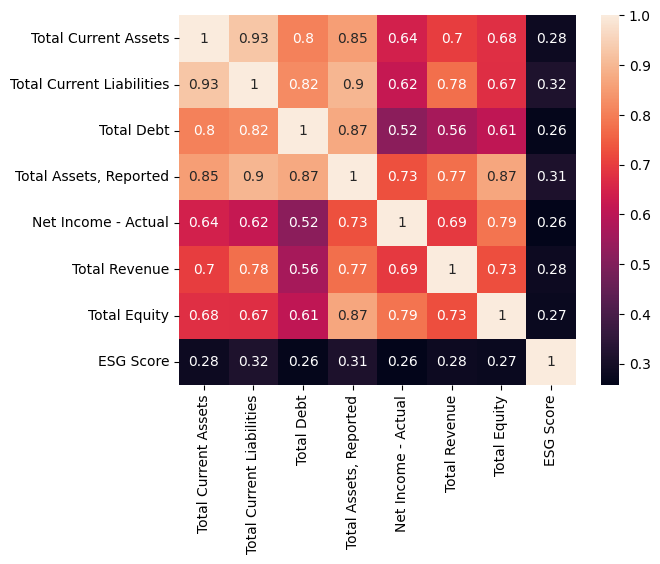

<Figure size 2000x2000 with 0 Axes>

In [100]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

It is clear from the heatmap that none of these features are correlated among each other

In [101]:
columns = [
    "Revenue Per Share",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
    "ESG Score",
]

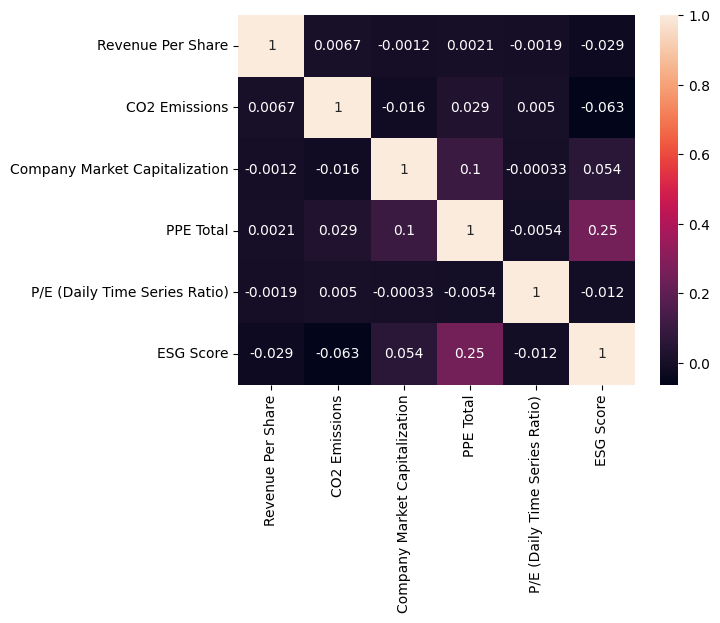

<Figure size 2000x2000 with 0 Axes>

In [102]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

In [103]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Total Revenue",
    "Total Equity",
    "Net Income - Actual",
    "PPE Total",
    "Revenue Per Share",
    "CO2 Emissions",
    "Company Market Capitalization",
    "P/E (Daily Time Series Ratio)",
]

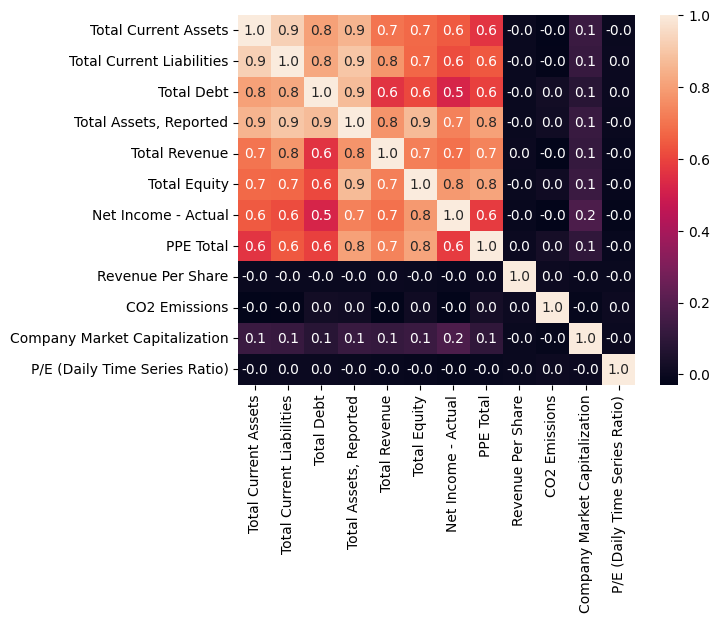

<Figure size 3000x3000 with 0 Axes>

In [104]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True, fmt=".1f")
plt.figure(figsize=(30, 30))
plt.show()

#### Data Imputation

In [105]:
columns_to_impute = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Revenue Per Share",
    "Total Revenue",
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
]

In [106]:
df_firm = df_firm.dropna(
    subset=columns_to_impute,
    how="all",
)

In [107]:
df_firm.shape

(23760, 18)

In [108]:
df_firm[columns_to_impute] = df_firm.groupby(["RIC"])[
    columns_to_impute
].transform(lambda x: x.fillna(x.mean()))

In [109]:
df_firm.shape

(23760, 18)

In [110]:
df_firm.isna().sum()

RIC                                 0
Date                                0
Total Current Assets              900
Total Current Liabilities         900
Total Debt                          0
Total Assets, Reported              0
Net Income - Actual               104
Revenue Per Share                   0
Total Revenue                       0
Total Equity                        0
CO2 Emissions                      45
ESG Score                        6000
Social Pillar Score              6001
Governance Pillar Score          6000
Environmental Pillar Score       6001
Company Market Capitalization       0
PPE Total                         241
P/E (Daily Time Series Ratio)     102
dtype: int64

In [111]:
df_firm[columns_to_impute]=df_firm[columns_to_impute].fillna(df_firm.mean())

/var/folders/85/38gqqh4n5fx2l8tcp2c0412x0md1yy/T/ipykernel_99485/935695378.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_firm[columns_to_impute]=df_firm[columns_to_impute].fillna(df_firm.mean())


In [112]:
df_firm.isna().sum()

RIC                                 0
Date                                0
Total Current Assets                0
Total Current Liabilities           0
Total Debt                          0
Total Assets, Reported              0
Net Income - Actual                 0
Revenue Per Share                   0
Total Revenue                       0
Total Equity                        0
CO2 Emissions                       0
ESG Score                        6000
Social Pillar Score              6001
Governance Pillar Score          6000
Environmental Pillar Score       6001
Company Market Capitalization       0
PPE Total                           0
P/E (Daily Time Series Ratio)       0
dtype: int64

In [113]:
df_firm.columns

Index(['RIC', 'Date', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       'ESG Score', 'Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score', 'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)'],
      dtype='object')

In [114]:
df_firm_new = df_firm[df_firm['ESG Score'].notna()]

KNN Imputation

In [115]:
X = df_firm.drop(columns = ['Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score','RIC','Date'])

In [117]:
X.shape

(23760, 13)

In [118]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)
X = imputer.fit_transform(X)

In [119]:
X.shape

(23760, 13)

In [120]:
df_imputed = pd.DataFrame(X, columns = ['Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       'ESG Score', 'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)'])

In [121]:
df_firm ['ESG Score'] = df_imputed['ESG Score']

In [122]:
df_firm.shape

(23760, 18)

In [123]:
df_firm.isna().sum()

RIC                                 0
Date                                0
Total Current Assets                0
Total Current Liabilities           0
Total Debt                          0
Total Assets, Reported              0
Net Income - Actual                 0
Revenue Per Share                   0
Total Revenue                       0
Total Equity                        0
CO2 Emissions                       0
ESG Score                         687
Social Pillar Score              6001
Governance Pillar Score          6000
Environmental Pillar Score       6001
Company Market Capitalization       0
PPE Total                           0
P/E (Daily Time Series Ratio)       0
dtype: int64

In [124]:
df_firm = df_firm[df_firm['ESG Score'].notna()]

In [128]:
df_firm.describe([0.75,0.8,0.85,0.88,0.9])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,23073.000000,17238.000000,17239.000000,17238.000000,2.307300e+04,23073.000000,23073.000000
mean,4687.338669,3712.740499,4472.901344,15001.832321,826.442397,107.361805,10195.897172,5110.907694,374.254087,52.911752,57.807477,55.814305,52.169836,2.106372e+04,8556.197347,45.249698
std,13281.697822,10089.435403,13432.307488,37533.294270,2618.055090,2779.986979,27850.339158,13825.898337,1398.226180,17.837653,22.000629,21.575963,25.542867,2.445388e+05,27255.601941,231.219945
min,0.018617,0.026879,0.000000,0.018617,-9703.255825,-33.626790,-188.078000,-85560.000000,0.000000,1.019613,0.263458,0.249062,0.000000,4.115218e-01,0.000000,0.124464
50%,1273.212729,883.445231,977.804000,3784.534817,165.544332,16.755698,2434.766000,1345.000000,40.064161,52.071780,59.346335,57.478632,54.516657,3.324993e+03,1500.000000,20.425396
75%,4186.500000,3119.000000,3493.847947,11734.500000,587.471756,40.455093,7826.900000,4009.385051,178.961947,66.539845,75.806258,73.257341,73.201747,1.110090e+04,5981.286796,32.474405
80%,4679.779456,3712.732628,4755.091873,15774.436224,796.313900,49.559893,10514.626864,5413.613560,296.564946,69.811269,79.004966,76.340187,77.065867,1.486577e+04,8487.124190,37.591846
85%,6271.942388,4738.410078,6865.431948,22514.782800,1111.120000,64.065004,14704.098058,7484.454147,455.195108,73.317468,82.565531,79.780430,80.459345,2.134411e+04,11587.292366,45.301422
88%,8105.355905,6377.971549,8873.720000,30067.061408,1443.708997,77.531943,18863.245811,9516.589879,611.903582,75.596438,84.797207,81.935990,82.797894,2.680617e+04,15409.297024,52.847056
90%,9890.800000,8114.831071,10366.995600,36149.713848,1829.049824,87.945523,22542.614352,11239.270860,768.344200,77.363980,86.293569,83.418149,84.284978,3.251433e+04,18586.020000,59.417870


In [130]:
df_firm[df_firm['Total Current Assets']<=5000].describe([0.75,0.8,0.85,0.88,0.9])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,13141.000000,13142.000000,13141.000000,1.884400e+04,18844.000000,18844.000000
mean,1402.218057,1101.101000,1799.032429,5265.209225,249.392372,111.979231,3153.866424,1870.185662,382.790491,52.985573,53.677460,53.535314,47.003681,6.074225e+03,3097.192262,46.516677
std,1397.708414,1301.942809,3764.377352,9551.351252,481.650677,3074.186510,4902.583560,2945.540932,1483.945492,17.735236,21.231321,21.310247,24.867306,2.024371e+04,6165.420836,229.020858
min,0.018617,0.026879,0.000000,0.018617,-3924.579000,-33.626790,-188.078000,-18209.000000,0.000000,1.019613,1.120470,0.249062,0.000000,4.115218e-01,0.000000,0.124464
50%,863.050000,570.285500,636.708500,2563.118000,112.298954,13.974118,1646.179316,938.196655,40.096170,52.068488,54.166141,54.659346,48.076347,2.268026e+03,944.413872,20.930448
75%,2146.382575,1546.093380,1902.796684,6123.193250,310.494527,33.530754,4002.040250,2179.464947,166.650849,66.491309,70.507114,70.797688,66.451996,6.021145e+03,3035.542718,34.007131
80%,2561.923000,1898.696998,2430.918248,7399.600000,392.577453,40.295309,4867.427474,2664.502602,278.497765,69.736269,74.196532,73.851824,70.616904,7.656747e+03,3971.340000,39.870707
85%,3092.718300,2392.057018,3216.397092,9208.764666,495.795994,50.318627,6041.250679,3368.688115,432.979837,73.257084,77.753331,77.309712,75.084557,9.984231e+03,5641.314321,47.676232
88%,3506.360000,2798.721149,3887.683512,10637.664000,591.000000,60.600487,7001.373756,4008.968000,581.654497,75.539164,80.144392,79.744551,78.140325,1.190876e+04,7165.018661,56.073016
90%,3844.895967,3184.677800,4534.870383,12058.833719,676.687710,69.278748,7760.062600,4615.225049,749.623443,77.323111,82.064850,81.445689,79.967949,1.372689e+04,8534.061201,63.675399


#### Simple Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
columns_selected = [
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
]

In [131]:
X = df_firm_new[df_firm_new['Total Current Assets']<=5000][columns_selected]
y = df_firm_new[df_firm_new['Total Current Assets']<=5000]['ESG Score']

In [132]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
X = scaler.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  306.8032730638605
mean_absolute_error :  14.429062254051216


In [135]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.03127083, 0.06739193, 0.06773624, 0.04519298, 0.04247759])

In [136]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  229.15607713356587
mean_absolute_error :  12.17213868799894


In [137]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.26127152, 0.25089446, 0.26659676, 0.2614771 , 0.2903537 ])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

In [ ]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

In [ ]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(estimator=RandomForestRegressor())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))


In [ ]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  